# Práctica de agrupamiento

## Autoría

* Nombre: Jorge Cabrera Rodríguez
* Email: alu0101351773@ull.edu.es
* Universidad: Universidad de La Laguna
* Máster: Ciberseguridad e Inteligencia de Datos
* Repositorio: [enlace](https://github.com/alu0101351773/ECBD_practicas.git)

## Introducción al dataset

En la base de datos _mallCustomers.csv_ se recogen los datos de 200 clientes de un centro comercial. El fichero consta de 5 variables, incluyendo el identificador de cada cliente (**CustomerID**).

Las variables en cuestión son las siguientes:

| Variable       | Descripción                                    | Valores       |
| -------------- | ---------------------------------------------- | ------------- |
| `Customer ID`    | identificador del cliente                      | Numérico      |
| `Gender`         | género del cliente                             | Male / Female |
| `Age`            | edad del cliente                               | Numérico      |
| `Annual.income`  | ingresos anuales del cliente                   | Numérico      |
| `Spending.score` | puntuación dada al cliente por el supermercado | Numérico      |

In [81]:
import pandas as pd

data = pd.read_csv(
    "../data/Base de datos - mallCustomers.csv"
)

data.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Ya que el ID de los usuarios es irrelevante a la hora de realizar el agrupamiento, se ha decidido eliminar esta columna del dataset.

In [82]:
if 'CustomerID' in data.columns:
    data.drop(columns = ['CustomerID'], inplace = True)
data.head()

,Genre,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Construcción de agrupamientos

### Agrupamiento con k-medias _(k-means)_

Lo primero que podemos hacer para visualizar los datos es representarlos mediante nubes de puntos, una por cada par de variables. De esta forma, podemos hacernos una idea de cómo se distribuyen los datos y si existen agrupamientos claros.

Para ello, vamos a graficar las siguientes variables:

* `Age` y `Annual.income`
* `Age` y `Spending.score`
* `Annual.income` y `Spending.score`

Text(970.81045751634, 0.5, 'Puntuación de gasto')

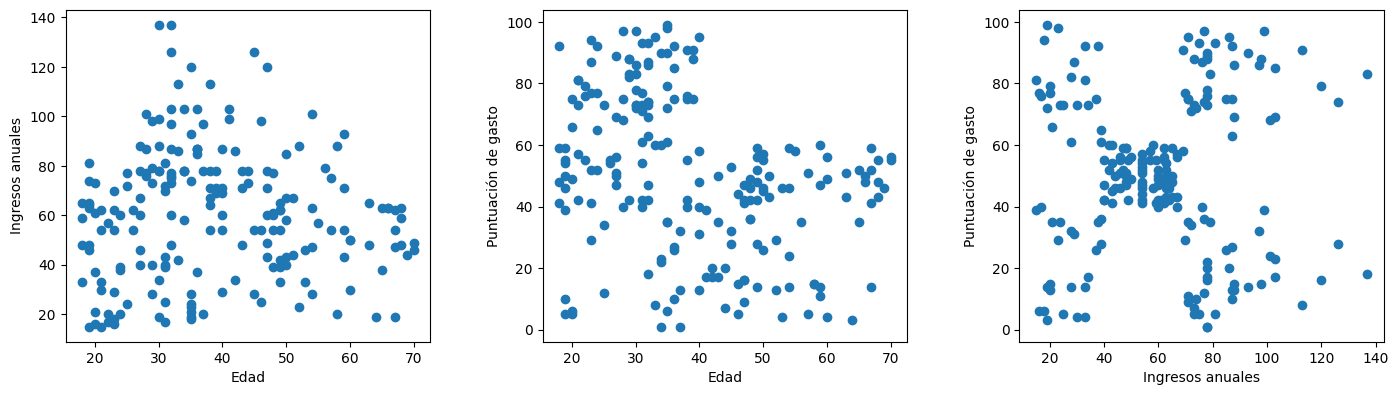

In [83]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
fig.tight_layout(pad = 5.0)

ax1.scatter(data['Age'], data['Annual Income'])
ax1.set_xlabel('Edad')
ax1.set_ylabel('Ingresos anuales')

ax2.scatter(data['Age'], data['Spending Score'])
ax2.set_xlabel('Edad')
ax2.set_ylabel('Puntuación de gasto')

ax3.scatter(data['Annual Income'], data['Spending Score'])
ax3.set_xlabel('Ingresos anuales')
ax3.set_ylabel('Puntuación de gasto')

Podemos observar una clara agrupación entre las variables `Spending Score` y `Annual Income`, por lo que podría ser interesante comenzar por ese par de variables para realizar el agrupamiento.

Comenzaremos con un _clustering_ de 5 grupos, para probar el funcionamiento del algoritmo de forma primitiva. Más adelante, calcularemos el número de grupos acorde al criterio del codo (_elbow method_).

Text(0.5, 1.0, 'Clustering con KMeans')

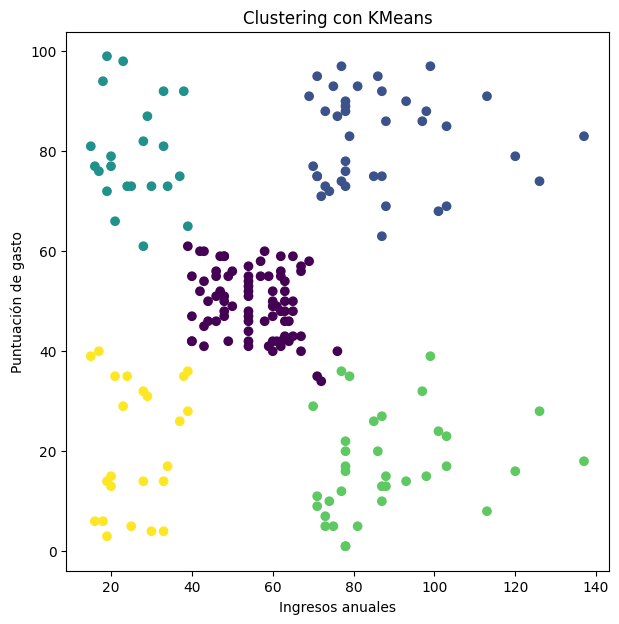

In [85]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 42, n_init = 'auto')
kmeans.fit(data[['Spending Score', 'Annual Income']])

labels = kmeans.labels_

fig, ax = plt.subplots(1, 1, figsize = (7, 7))

ax.scatter(
    data['Annual Income'],
    data['Spending Score'],
    c = labels
)
ax.set_xlabel('Ingresos anuales')
ax.set_ylabel('Puntuación de gasto')
ax.set_title('Clustering con KMeans')

Podemos ver un agrupamiento con 5 grupos bastante bien distanciados y definidos. Ahora calcularemos el valor de información retenida de cada posible valor de _k_ para ver cuál es el número óptimo de grupos.

In [64]:
import numpy as np

def information_value(data: pd.DataFrame, cluster_number: int = 1) -> float:
    kmeans = KMeans(n_clusters = cluster_number, random_state = 42, n_init = 'auto')
    kmeans.fit(data)

    labels = kmeans.labels_
    total_variance = np.var(data, axis = 0).sum()
    cluster_centers = kmeans.cluster_centers_
    clustered_data = cluster_centers[labels]
    explained_variance = np.var(clustered_data, axis=0).sum()

    return explained_variance / total_variance    

Text(0.5, 1.0, 'Valor de la información para diferentes números de clusters')

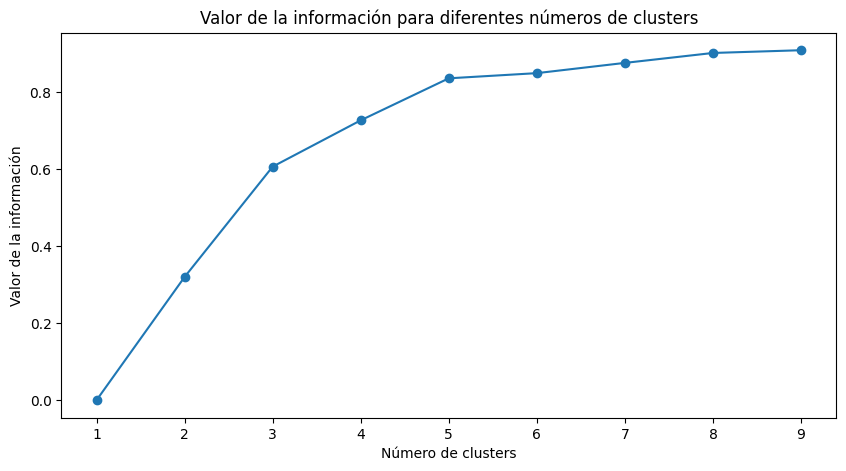

In [68]:
import numpy as np

k_values = np.arange(1, 10)
information_values = []

for i in range(1, 10):
    information_values += [information_value(data[['Annual Income', 'Spending Score']], i)]

fig, ax = plt.subplots(1, 1, figsize = (10, 5))

ax.plot(k_values, information_values, marker = 'o')
ax.set_xlabel('Número de clusters')
ax.set_ylabel('Valor de la información')
ax.set_title('Valor de la información para diferentes números de clusters')

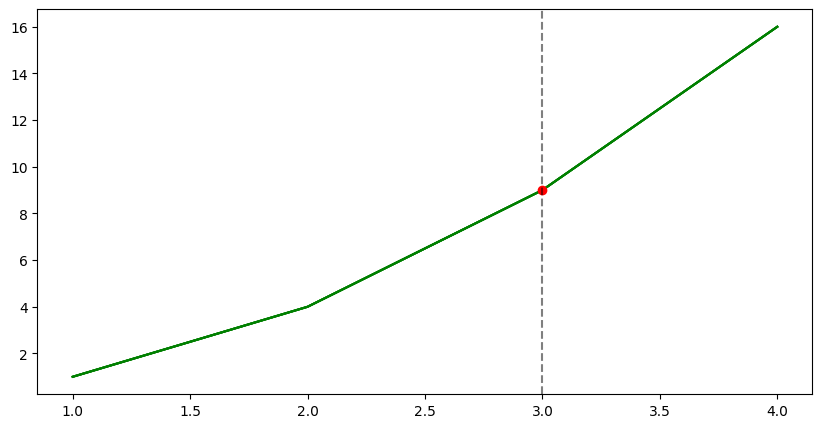

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = [1, 2, 3, 4]
y = [i**2 for i in x]  # Puedes ajustar esta función para tus datos reales

# Valor de X a partir del cual quieres cambiar el color
x_cambio_color = 5

# Valor umbral para la pendiente
umbral_pendiente = 1  # Ajusta este valor según tus necesidades

# Inicializa una variable para realizar el seguimiento del color
color = 'b'  # Color inicial

# Inicializa una variable para el valor anterior de Y
anterior_y = y[0]

# Crea la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for i in range(len(x)):    
    pendiente_actual = (y[i] - anterior_y) / (x[i] - x[i-1])
    if pendiente_actual < umbral_pendiente:
        color = 'r'  # Cambia a color rojo si la pendiente es menor que el umbral
    else:
        color = 'b'  # Vuelve al color azul si la pendiente es mayor o igual al umbral
    ax.plot(x, y, color= 'g')

    # Actualiza el valor anterior de Y
    anterior_y = y[i]


plt.plot(3, 9, 'ro')
# Añade una línea vertical para indicar el cambio de colors
ax.axvline(3, color='k', linestyle='--', alpha=0.5)

### Agrupamiento jerárquico

## Construcción de agrupamientos considerando el género

### Agrupamiento con k-medias _(k-means)_

### Agrupamiento jerárquico